<img src="https://miro.medium.com/max/800/0*elSDSNS2zO3owO9f.jpeg" />

# Iris Flowers Classification 

### Introduction to Iris Flower Classification using SVM
In this project, we will focus on using the Support Vector Machine (SVM) algorithm for the classification of Iris flowers based on the length of their petals and sepals. SVM is a popular supervised machine learning algorithm known for its effectiveness in solving classification problems.

The Iris flower dataset is a well-known and widely used dataset in the machine learning community. It consists of 150 samples, where each sample represents an Iris flower and contains measurements of four features: sepal length, sepal width, petal length, and petal width. Additionally, each sample is labeled with one of three classes: Versicolor, Setosa, or Virginica.

The goal of this project is to build a model that can accurately classify Iris flowers into their respective species based solely on the length of their petals and sepals. By training an SVM model on a subset of the dataset, we can learn the patterns and relationships between the input features and the target labels. Once trained, the model can make predictions on new, unseen Iris flowers.

By accurately classifying Iris flowers based on their petal and sepal lengths, we can gain insights into the distinguishing characteristics of different flower species. This project serves as a foundational example for understanding the concepts of classification and applying the SVM algorithm to real-world datasets.

It's important to note that while SVM is a powerful algorithm for classification tasks, the choice of algorithm depends on the specific requirements of the problem. Other algorithms such as logistic regression, decision trees, or random forests may also be suitable for Iris flower classification. Experimentation and evaluation of different models can help determine the most effective approach for a given task.

### Step 1: Load the data

In [1]:
# DataFlair Iris Flower Classification
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Explanatory Data Analysis(EDA)

In [3]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'species'] 
# Some basic statistical analysis about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


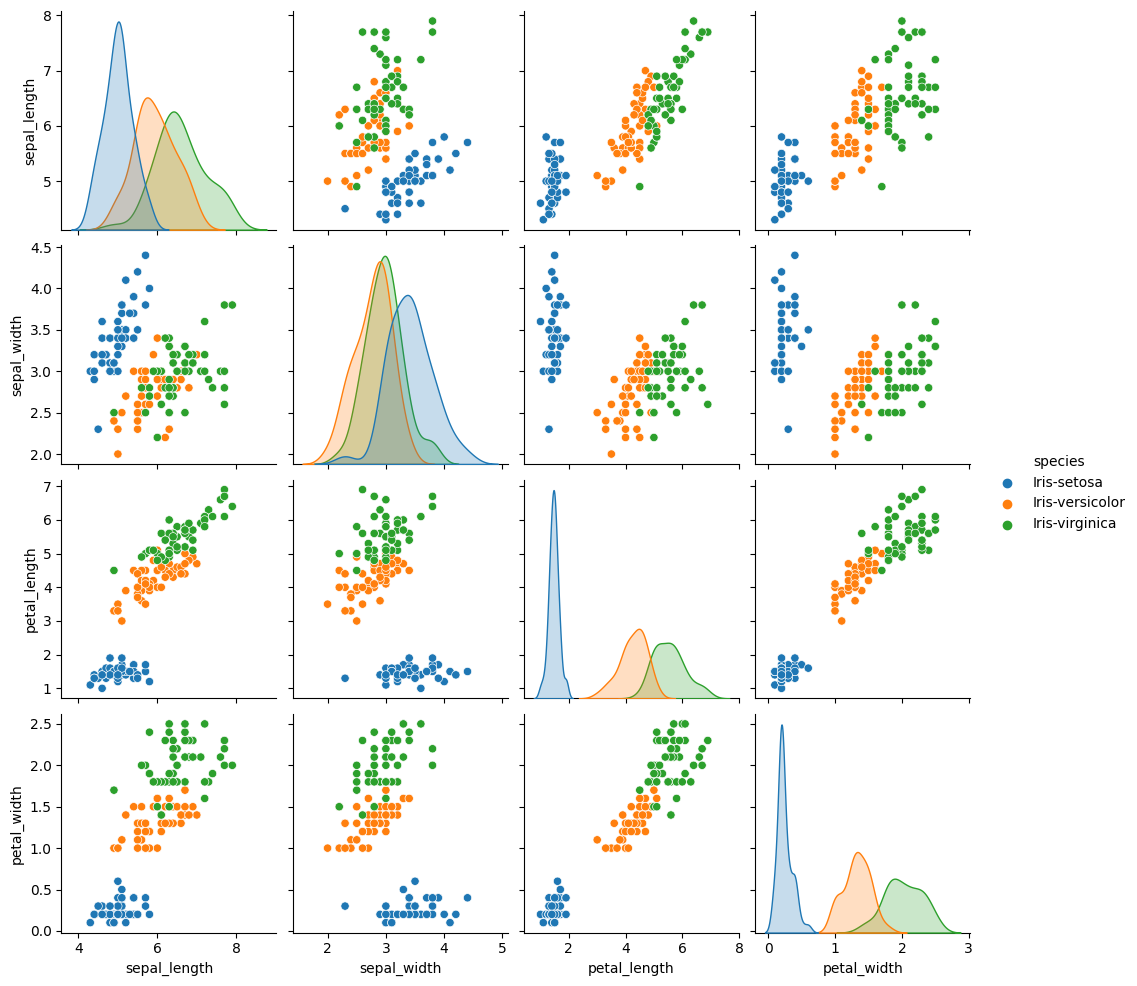

In [4]:
# Visualize the whole dataset
sns.pairplot(df, hue='species')

In [5]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [6]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

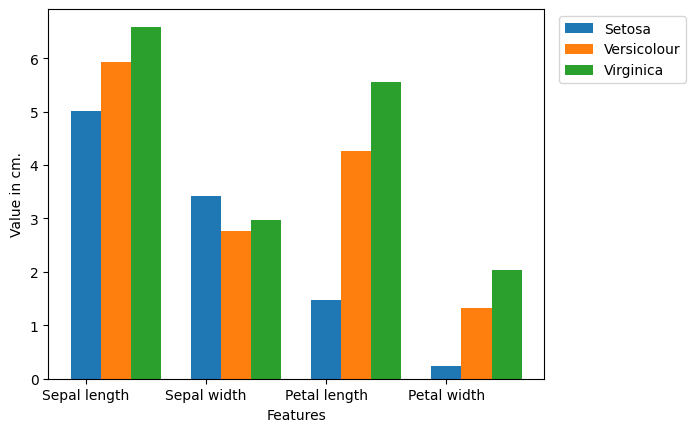

In [7]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

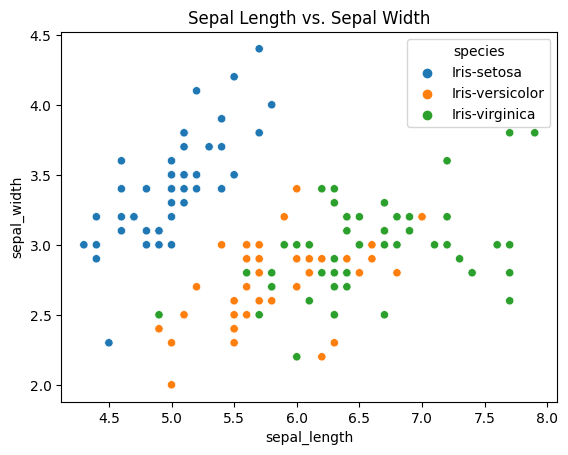

In [8]:
# Scatter plot of sepal length versus sepal width
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs. Sepal Width')
plt.show()

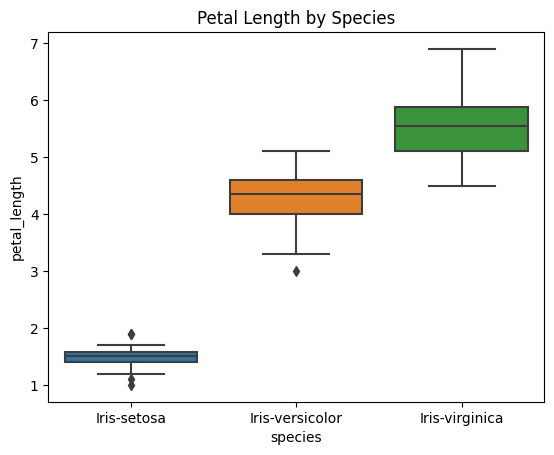

In [9]:
# Box plot of petal length for each species
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Petal Length by Species')
plt.show()

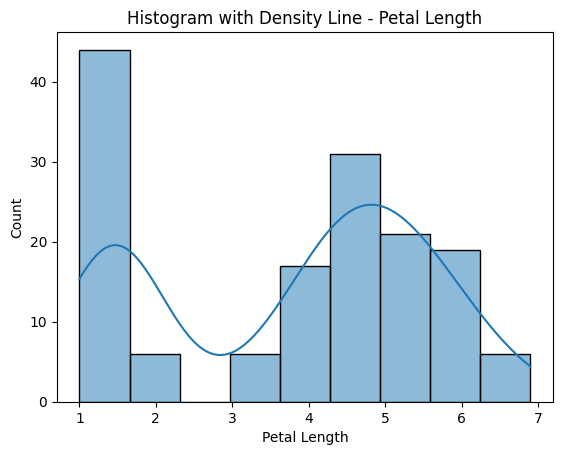

In [10]:
# Histogram with density line for petal length
sns.histplot(data=df, x='petal_length', kde=True)
plt.title('Histogram with Density Line - Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Count')
plt.show()

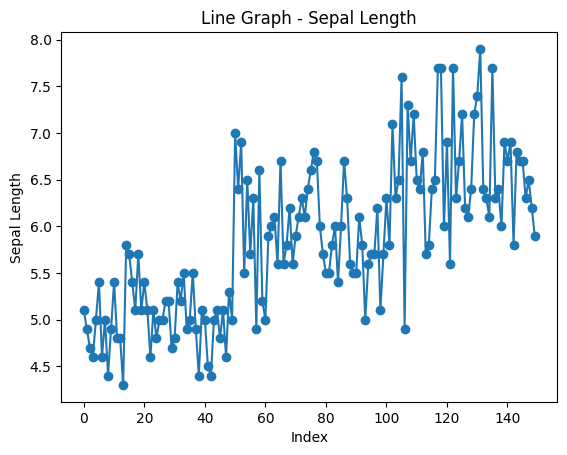

In [11]:
# Line graph for sepal length
plt.plot(df['sepal_length'], marker='o')
plt.title('Line Graph - Sepal Length')
plt.xlabel('Index')
plt.ylabel('Sepal Length')
plt.show()

### Step 3: Model training

In [12]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

### Step 4: Model Evaluation

In [14]:
# Predict from the test dataset
predictions = svn.predict(X_test)
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9333333333333333

In [15]:
# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print("""The classification report provides a comprehensive overview of the predictions made by a model. It includes several key metrics:
1. Precision: This metric calculates the proportion of true positive predictions to the sum of true positive and false positive predictions. It indicates the accuracy of positive predictions made by the model.

2. Recall: This metric calculates the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the model's ability to identify all positive instances correctly.

3. F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single value that represents the overall performance of the model, balancing both precision and recall.

4. Support: The support metric represents the actual occurrences of a class in the given dataset. It indicates the number of instances or observations belonging to each class.

-> In summary, the classification report offers a detailed assessment of prediction performance by analyzing precision, recall, F1-score, and support metrics for each class.""")

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.92      0.92      0.92        13
 Iris-virginica       0.80      0.80      0.80         5

       accuracy                           0.93        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.93      0.93      0.93        30

The classification report provides a comprehensive overview of the predictions made by a model. It includes several key metrics:
1. Precision: This metric calculates the proportion of true positive predictions to the sum of true positive and false positive predictions. It indicates the accuracy of positive predictions made by the model.

2. Recall: This metric calculates the ratio of true positive predictions to the sum of true positive and false negative predictions. It measures the model's ability to identify all positive instances correctly.

3. F1-score: The F1-score is the harmonic mean

### Step 5: Model Evaluation

In [16]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Step 6: Save the model

In [17]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)